In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('./basketball_stat.csv')

In [3]:
df

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


In [4]:
df.columns

Index(['Player', 'Pos', '3P', '2P', 'TRB', 'AST', 'STL', 'BLK'], dtype='object')

In [9]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

ValueError: Unrecognized character T in format string

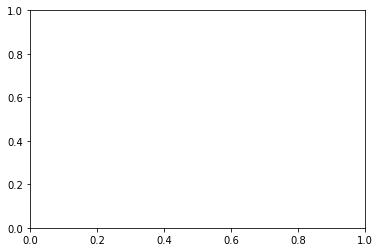

In [12]:
train, test = train_test_split(df, test_size=0.2)


In [13]:
train[['Pos']].values.ravel()

array(['SG', 'SG', 'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'SG', 'SG',
       'SG', 'SG', 'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'SG', 'SG',
       'SG', 'C', 'C', 'SG', 'C', 'C', 'C', 'SG', 'C', 'SG', 'C', 'SG',
       'C', 'C', 'C', 'SG', 'C', 'SG', 'C', 'SG', 'SG', 'SG', 'C', 'SG',
       'C', 'C', 'SG', 'C', 'C', 'SG', 'SG', 'SG', 'C', 'C', 'SG', 'SG',
       'SG', 'C', 'SG', 'SG', 'SG', 'C', 'C', 'SG', 'C', 'C', 'C', 'SG',
       'SG', 'C', 'C', 'SG', 'C', 'C', 'C', 'C', 'C', 'SG'], dtype=object)

In [18]:
kn = KNeighborsClassifier(n_neighbors=3)
# max_k_range = train.shape[0]
# k_list = []
# for i in range(3, max_k_range, 2):
#     k_list.append(i)
# corss_validation_scores = []

x_train = train[["3P", "BLK", "TRB"]]
y_train = train[["Pos"]]

kn.fit(x_train, y_train.values.ravel())

x_test = test[['3P', 'BLK', 'TRB']]
y_test = test[['Pos']]

pred = kn.predict(x_test)

print(accuracy_score(y_test.values.ravel(), pred))

0.95


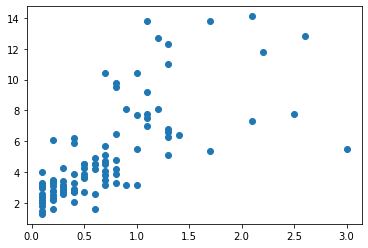

In [19]:
# 선형회귀

from sklearn.linear_model import LinearRegression

line_fitter = LinearRegression()

X = df['BLK']
y = df['TRB']

plt.plot(X, y, 'o')
plt.show()

[6.51459544]
[3.67474119]
2.472380130766436


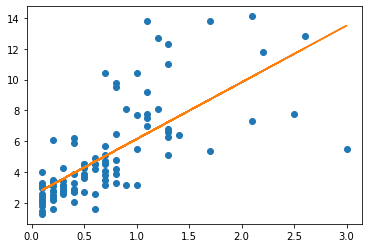

In [20]:
line_fitter.fit(X.values.reshape(-1,1), y)
print(line_fitter.predict([[1.1]]))
print(line_fitter.coef_)
print(line_fitter.intercept_)

plt.plot(X, y, 'o')
plt.plot(X, line_fitter.predict(X.values.reshape(-1,1)))
plt.show()